In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Case 1 Sistem Rekomendasi Untuk Student SA

In [3]:
# Step 1 : Get Data
desc_dm = 'In Digital Marketing, we learn how to promoted to segmented market'
desc_wd = 'In Web Development, we learn how to create web and mobile apps'
desc_ds = 'In Data Science, we learn how to create recommender system'

documents = [desc_dm, desc_wd, desc_ds]

In [4]:
documents

['In Digital Marketing, we learn how to promoted to segmented market',
 'In Web Development, we learn how to create web and mobile apps',
 'In Data Science, we learn how to create recommender system']

In [9]:
# Step 2 : Using the countvectorizer

cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(documents)

In [10]:
matrix.toarray()

array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [11]:
cv.get_feature_names()

['apps',
 'create',
 'data',
 'development',
 'digital',
 'learn',
 'market',
 'marketing',
 'mobile',
 'promoted',
 'recommender',
 'science',
 'segmented',
 'web']

In [12]:
# Step 3 (additional) : Show what countvectorizer does

df_coba = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names(), 
                       index=['Digital Marketing', 'Web Development', 'Data Science'])


In [13]:
df_coba

,apps,create,data,development,digital,learn,market,marketing,mobile,promoted,recommender,science,segmented,web
Digital Marketing,0,0,0,0,1,1,1,1,0,1,0,0,1,0
Web Development,1,1,0,1,0,1,0,0,1,0,0,0,0,2
Data Science,0,1,1,0,0,1,0,0,0,0,1,1,0,0


In [14]:
# Step 4 : calculate cosine similarity

cos_score = cosine_similarity(matrix)

In [15]:
cos_score

array([[1.        , 0.13608276, 0.18257419],
       [0.13608276, 1.        , 0.2981424 ],
       [0.18257419, 0.2981424 , 1.        ]])

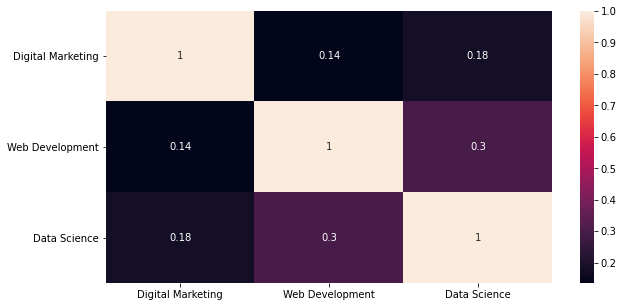

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(cos_score, annot=True, 
           xticklabels=df_coba.index, 
           yticklabels=df_coba.index)

In [32]:
# Step 5 : Show Recommendation
class_taken = int(input('What class did you take? (0:DM, 1:WD, 2:DS)'))

urutan_kelas = sorted(list(enumerate(cos_score[0])), key=lambda x : x[1], reverse=True)

next_class = []
for i,j in urutan_kelas[1:]:
    next_class.append(df_coba.index[i])
print(f'because you took {df_coba.index[class_taken]}, here are similar class:')
for i,j in enumerate(next_class):
    print(f'{i+1}.{j}')

What class did you take? (0:DM, 1:WD, 2:DS)2
because you took Data Science, here are similar class:
1.Data Science
2.Web Development


In [33]:
anime = pd.read_csv('anime.csv')

In [34]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [36]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [35]:
anime['name'].unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [37]:
anime = anime.iloc[:, :4]

In [38]:
anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [39]:
anime.isna().sum()

anime_id     0
name         0
genre       62
type        25
dtype: int64

In [40]:
anime.dropna(inplace=True)

In [41]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
dtype: int64

In [42]:
anime.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [47]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_genre = cv.fit_transform(anime['genre']) 


In [48]:
cv.get_feature_names()

['action',
 'adventure',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'magic',
 'martial arts',
 'mecha',
 'military',
 'music',
 'mystery',
 'parody',
 'police',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci-fi',
 'seinen',
 'shoujo',
 'shoujo ai',
 'shounen',
 'shounen ai',
 'slice of life',
 'space',
 'sports',
 'super power',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [49]:
cos_score = cosine_similarity(by_genre)

In [51]:
cos_score[0]

array([1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [53]:
anime_liked = input('What is your favorite anime ?')
index_disukai = anime[anime['name']==anime_liked].index

anime_recom = sorted(list(enumerate(cos_score[index_disukai[0]])), key=lambda x : x[1], reverse=True)
print(f'Since you watch {anime.iloc[index_disukai[0]][0]}, here are similiar anime:')
n=1
for i,j in anime_recom[:10]:
    print(f'{n}. {anime.iloc[i][0]} (genre:{anime.iloc[i][1]})')
    n+=1

What is your favorite anime ?Gintama°
Since you watch 28977, here are similiar anime:
1. 28977 (genre:Gintama°)
2. 9969 (genre:Gintama&#039;)
3. 15335 (genre:Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare)
4. 15417 (genre:Gintama&#039;: Enchousen)
5. 918 (genre:Gintama)
6. 21899 (genre:Gintama: Yorinuki Gintama-san on Theater 2D)
7. 7472 (genre:Gintama Movie: Shinyaku Benizakura-hen)
8. 9735 (genre:Gintama: Shinyaku Benizakura-hen)
9. 25313 (genre:Gintama: Jump Festa 2014 Special)
10. 34096 (genre:Gintama (2017))


### Latihan :
1. Buat recommender system dengan data anime menggunakan pendekatan content based, gunakan variabel Type
2. Buat recommender system dengan data anime menggunakan pendekatan content based, gunakan variabel Type & Genre


In [54]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_type = cv.fit_transform(anime['type']) 

In [57]:
cv.get_feature_names()

['movie', 'music', 'ona', 'ova', 'special', 'tv']

In [60]:
cos_score_type = cosine_similarity(by_type)

In [61]:
cos_score_type[0]

array([1., 0., 0., ..., 0., 0., 1.])

In [71]:
anime_liked = input('What is your favorite anime ?')
index_disukai = anime[anime['name']==anime_liked].index

anime_recom = sorted(list(enumerate(cos_score_type[index_disukai[0]])), key=lambda x : x[1], reverse=True)
print(f'Since you watch {anime.iloc[index_disukai[0]][0]}, here are similiar anime:')
n=1
for i,j in anime_recom[:10]:
    print(f'{n}. {anime.iloc[i][0]} (type:{anime.iloc[i][2]})')
    n+=1

What is your favorite anime ?Naruto
Since you watch 20, here are similiar anime:
1. 5114 (type:Action, Adventure, Drama, Fantasy, Magic, Military, Shounen)
2. 28977 (type:Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen)
3. 9253 (type:Sci-Fi, Thriller)
4. 9969 (type:Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen)
5. 32935 (type:Comedy, Drama, School, Shounen, Sports)
6. 11061 (type:Action, Adventure, Shounen, Super Power)
7. 15417 (type:Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen)
8. 4181 (type:Drama, Fantasy, Romance, Slice of Life, Supernatural)
9. 918 (type:Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen)
10. 2904 (type:Action, Drama, Mecha, Military, Sci-Fi, Super Power)


In [72]:
anime['genre_type'] = anime['type'] + str(', ') + anime['genre']

In [74]:
anime.head()

,anime_id,name,genre,type,genre_type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,"Movie, Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"TV, Action, Adventure, Drama, Fantasy, Magic, ..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"TV, Action, Comedy, Historical, Parody, Samura..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,"TV, Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"TV, Action, Comedy, Historical, Parody, Samura..."


In [75]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_type_genre = cv.fit_transform(anime['genre_type'])

In [76]:
cos_score_type_genre = cosine_similarity(by_type_genre)

In [82]:
anime_liked = input('What is your favorite anime ?')
index_disukai = anime[anime['name']==anime_liked].index

anime_recom = sorted(list(enumerate(cos_score_type_genre[index_disukai[0]])), key=lambda x : x[1], reverse=True)
print(f'Since you watch {anime.iloc[index_disukai[0]][0]}, here are similiar anime:')
n=1
for i,j in anime_recom[:10]:
    print(f'{n}. {anime.iloc[i][0]} (type:{anime.iloc[i][2]})')
    n+=1

What is your favorite anime ?Naruto
Since you watch 20, here are similiar anime:
1. 1735 (type:Action, Comedy, Martial Arts, Shounen, Super Power)
2. 20 (type:Action, Comedy, Martial Arts, Shounen, Super Power)
3. 1604 (type:Action, Comedy, Shounen, Super Power)
4. 813 (type:Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power)
5. 22777 (type:Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power)
6. 6033 (type:Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power)
7. 14527 (type:Action, Comedy, Ecchi, Martial Arts, School, Shounen, Super Power)
8. 30694 (type:Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power)
9. 11761 (type:Action, Comedy, Ecchi, Martial Arts, School, Shounen, Super Power)
10. 174 (type:Action, Comedy, Ecchi, Martial Arts, School, Shounen, Super Power)
